In [1]:
import mercantile
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import json
import Geohash as geo
from tqdm import tqdm
from geojson import MultiLineString, MultiPolygon, Polygon
from shapely import geometry
from shapely.ops import polygonize
import matplotlib.pyplot as plt
import contextily as ctx

with open(f'{os.getenv("HOME")}/code/explora_ld_client_tests/util/queries.json', 'r') as workload_file:
    query_dict = json.load(workload_file)

q13, q14, full_wl = [v for k,v in query_dict.items()]

In [2]:
tiles_z13 = {k:[mercantile.quadkey_to_tile(t) for t in k.split(',')] for k,v in q13.items()}
tiles_z14 = {k:[mercantile.quadkey_to_tile(t) for t in k.split(',')] for k,v in q14.items()}

In [3]:
q13

{'1202021302320,1202021302213,1202021302231,1202021302302': [{'lat': 51.206883404865614,
   'lng': 4.3505859475},
  {'lat': 51.26191484308452, 'lng': 4.3505859475},
  {'lat': 51.26191484308452, 'lng': 4.4384765525},
  {'lat': 51.206883404865614, 'lng': 4.4384765525},
  {'lat': 51.206883404865614, 'lng': 4.3505859475}],
 '1202021302320,1202021302302,1202021302303,1202021302321': [{'lat': 51.206883404865614,
   'lng': 4.39453126},
  {'lat': 51.26191484308452, 'lng': 4.39453126},
  {'lat': 51.26191484308452, 'lng': 4.482421865},
  {'lat': 51.206883404865614, 'lng': 4.482421865},
  {'lat': 51.206883404865614, 'lng': 4.39453126}],
 '1202021302322,1202021302231,1202021302233,1202021302320': [{'lat': 51.17934298928927,
   'lng': 4.3505859475},
  {'lat': 51.234407341634586, 'lng': 4.3505859475},
  {'lat': 51.234407341634586, 'lng': 4.4384765525},
  {'lat': 51.17934298928927, 'lng': 4.4384765525},
  {'lat': 51.17934298928927, 'lng': 4.3505859475}],
 '1202021302323,1202021302320,1202021302322,12

In [4]:
q13_polygons = list(polygonize([[tuple(ctuple.values())[::-1]  for ctuple in coords] for k, coords in q13.items()]))
q14_polygons = list(polygonize([[tuple(ctuple.values())[::-1]  for ctuple in coords] for k, coords in q14.items()]))

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

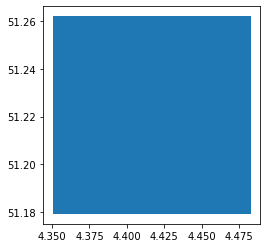

In [5]:
q13_gdf = gpd.GeoDataFrame({'geometry':q13_polygons, 'tiles': list(tiles_z13.values())}, crs="{\"init\" :\"epsg:4326\"}")
q13_gdf.plot()

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

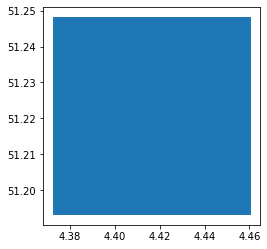

In [6]:
q14_gdf = gpd.GeoDataFrame({'geometry':q14_polygons, 'tiles': list(tiles_z14.values())}, crs="{\"init\" :\"epsg:4326\"}")
q14_gdf.plot()

In [7]:
q13_gdf

geometry  \
0  POLYGON ((4.35059 51.20688, 4.35059 51.26191, ...   
1  POLYGON ((4.39453 51.20688, 4.39453 51.26191, ...   
2  POLYGON ((4.35059 51.17934, 4.35059 51.23441, ...   
3  POLYGON ((4.39453 51.17934, 4.39453 51.23441, ...   

                                               tiles  
0  [(4196, 2734, 13), (4195, 2733, 13), (4195, 27...  
1  [(4196, 2734, 13), (4196, 2733, 13), (4197, 27...  
2  [(4196, 2735, 13), (4195, 2734, 13), (4195, 27...  
3  [(4197, 2735, 13), (4196, 2734, 13), (4196, 27...

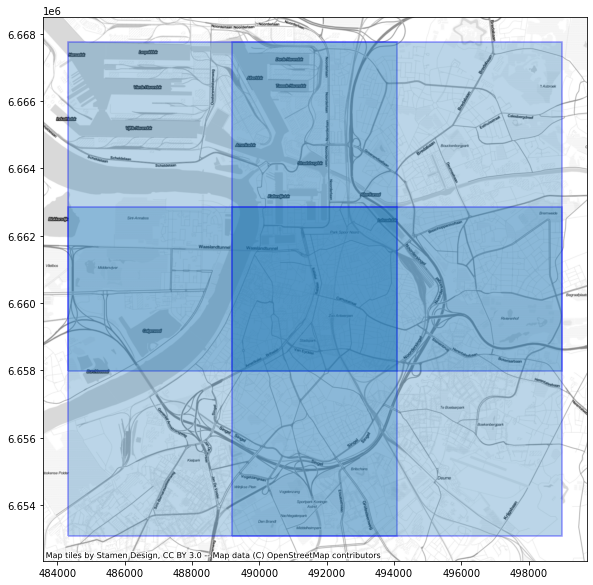

In [8]:
q13_gdf = q13_gdf.to_crs(epsg=3857)
ax1 = q13_gdf.plot(figsize=(10, 10), edgecolor='blue', linewidth=2., alpha=0.3)
ctx.add_basemap(ax1, zoom=14, url=ctx.providers.Stamen.TonerLite)

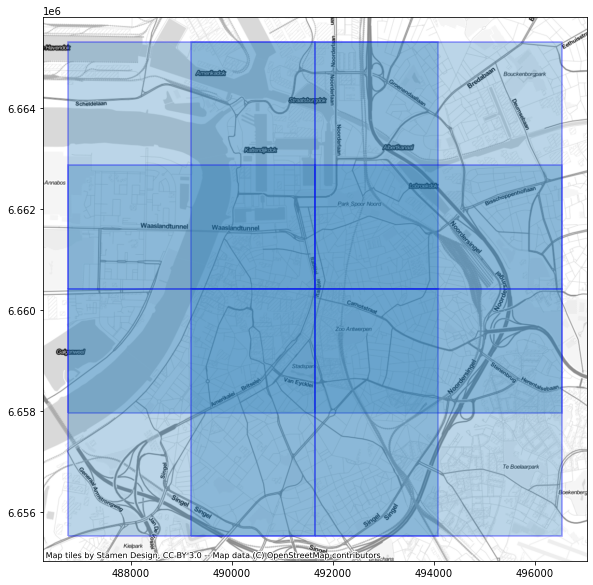

In [9]:
q14_gdf = q14_gdf.to_crs(epsg=3857)
ax0 = q14_gdf.plot(figsize=(10, 10), edgecolor='blue', linewidth=2., alpha=0.3)
ctx.add_basemap(ax0, zoom=14, url=ctx.providers.Stamen.TonerLite)

In [10]:
z13_grid = gpd.GeoDataFrame.from_file("./slippy_tiles_13.geojson").to_crs(epsg=3857)
z14_grid = gpd.GeoDataFrame.from_file("./slippy_tiles_14.geojson").to_crs(epsg=3857)

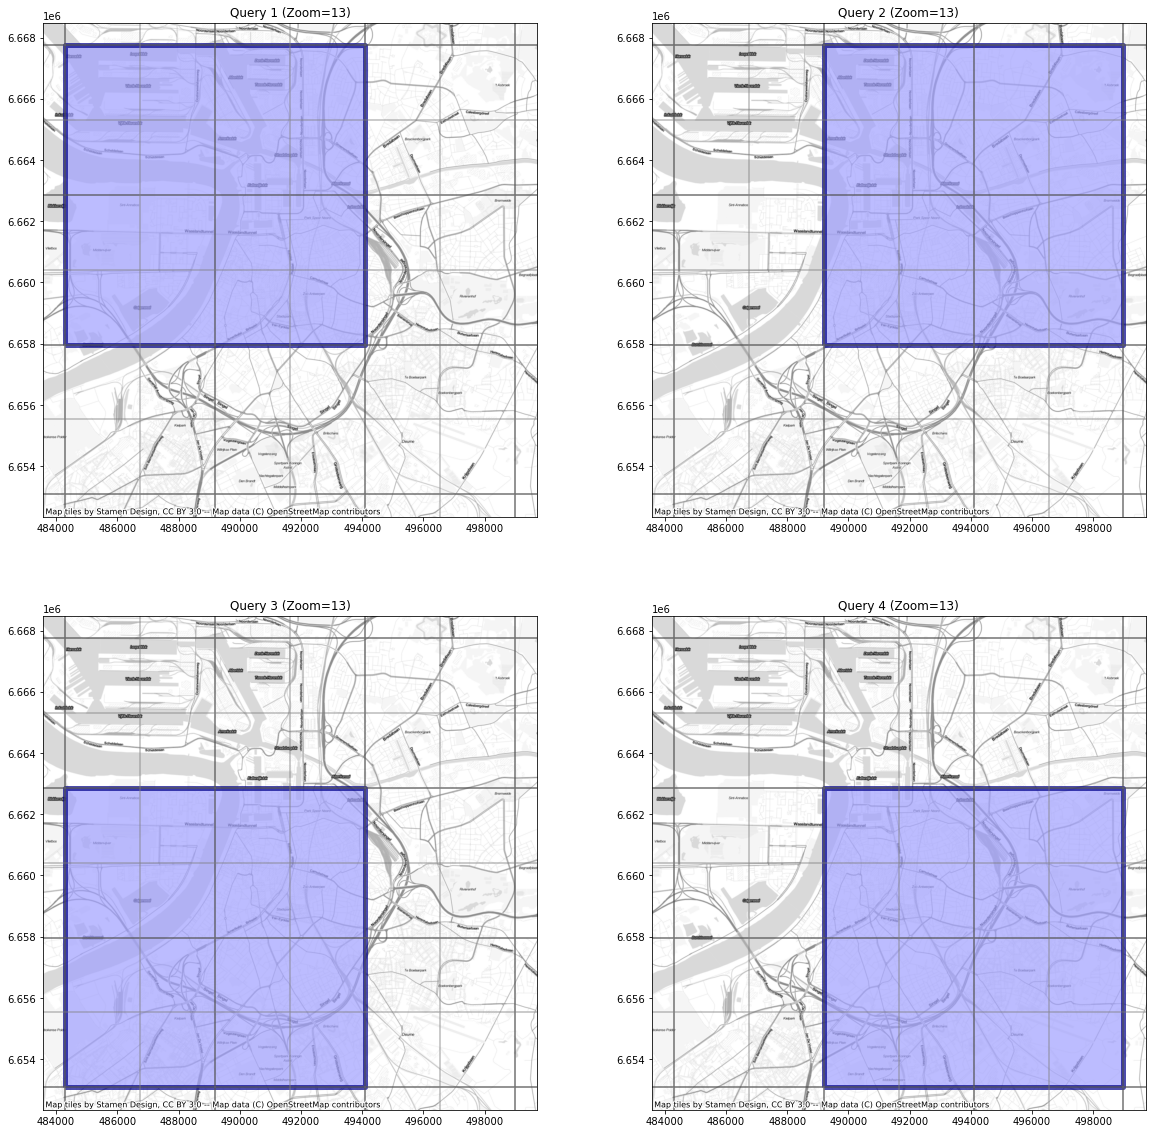

In [11]:
ylim = ax1.get_ylim()
xlim = ax1.get_xlim()

fig1, ax2 = plt.subplots(figsize=(20,20), nrows=2, ncols=2)
iter_ = 0
for i in range(q13_gdf.shape[0]):
    x_iter = int(iter_ / 2)
    y_iter = int(iter_ % 2)
    q13_gdf.loc[[i],'geometry'].plot(edgecolor='darkblue', linewidth=5., alpha=0.7, ax=ax2[x_iter, y_iter], facecolor="#a0a0ff")
    z13_grid.plot(ax=ax2[x_iter, y_iter], alpha=0.2, linewidth=2., facecolor="none", edgecolor="black")
    z14_grid.plot(ax=ax2[x_iter, y_iter], alpha=0.3, linewidth=1.5, facecolor="none", edgecolor="grey")
    ax2[x_iter, y_iter].set_title(f'Query {i+1} (Zoom=13)')
    iter_ = iter_ + 1

for ax in ax2.flatten():
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ctx.add_basemap(ax, zoom=14, url=ctx.providers.Stamen.TonerLite)

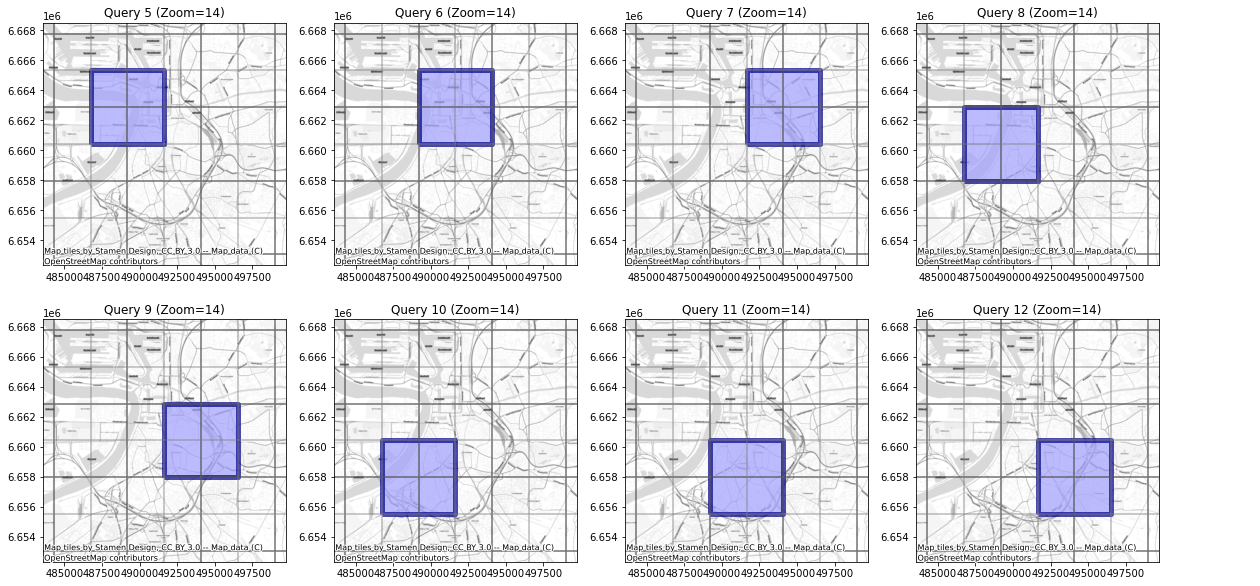

In [12]:
fig1, ax3 = plt.subplots(figsize=(20,10), nrows=2, ncols=4)
iter_ = 0
for i in range(q14_gdf.shape[0]):
    x_iter = int(iter_ / 4)
    y_iter = int(iter_ % 4)
    q14_gdf.loc[[i],'geometry'].plot(edgecolor='darkblue', linewidth=5., alpha=0.7, ax=ax3[x_iter, y_iter], facecolor="#a0a0ff")
    z13_grid.plot(ax=ax3[x_iter, y_iter], alpha=0.2, linewidth=2., facecolor="none", edgecolor="black")
    z14_grid.plot(ax=ax3[x_iter, y_iter], alpha=0.3, linewidth=1.5, facecolor="none", edgecolor="grey")
    ax3[x_iter, y_iter].set_title(f'Query {i+5} (Zoom=14)')
    iter_ = iter_ + 1

for ax in ax3.flatten():
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ctx.add_basemap(ax, zoom=14, url=ctx.providers.Stamen.TonerLite)

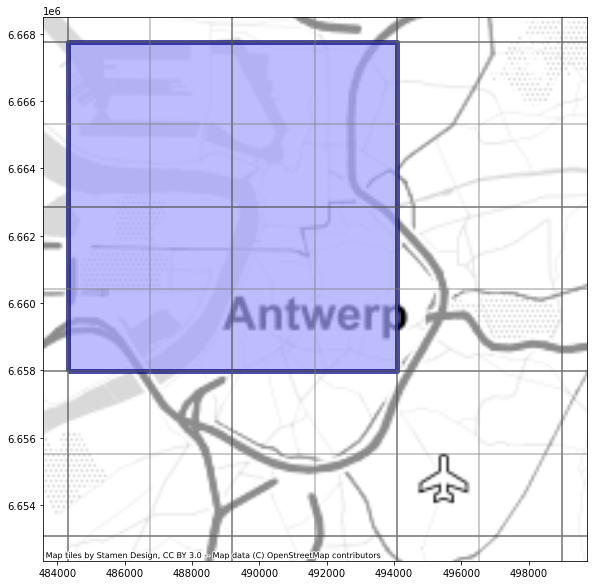

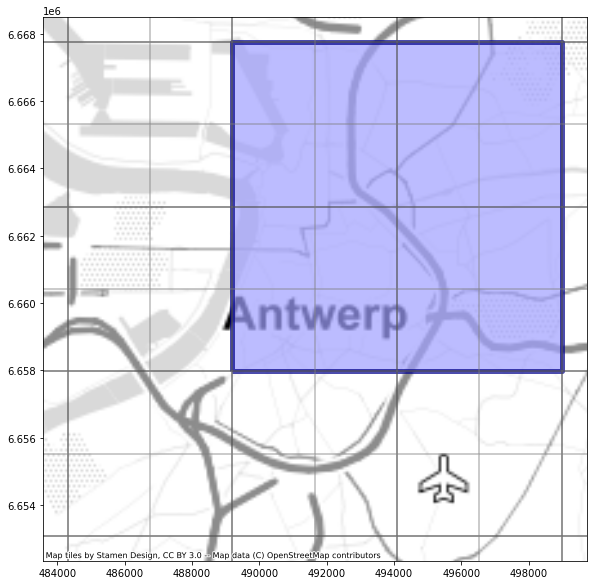

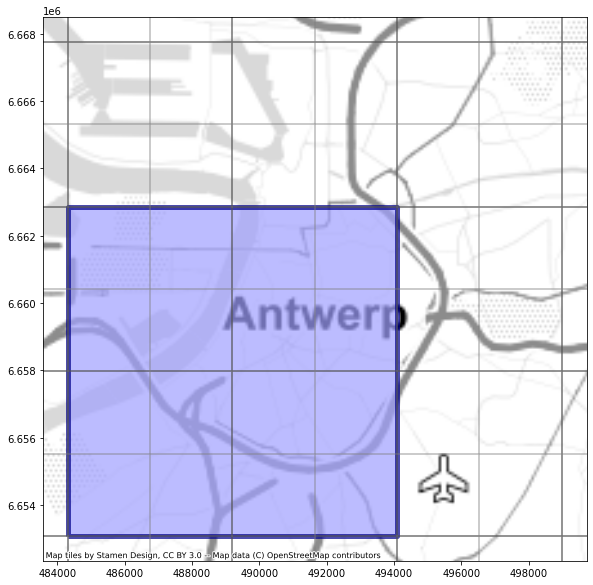

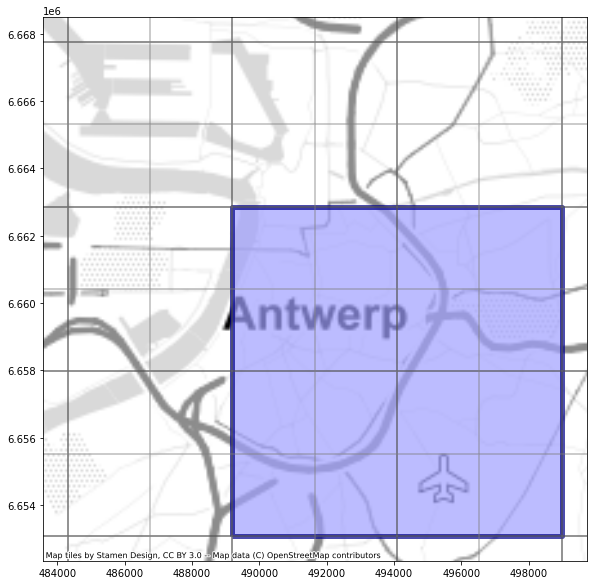

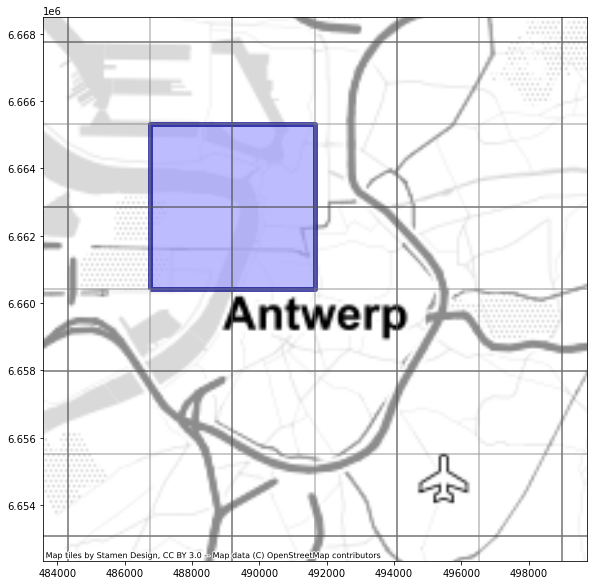

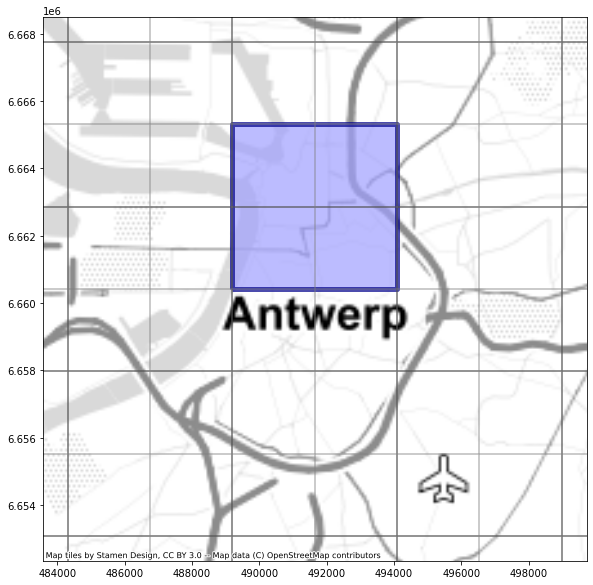

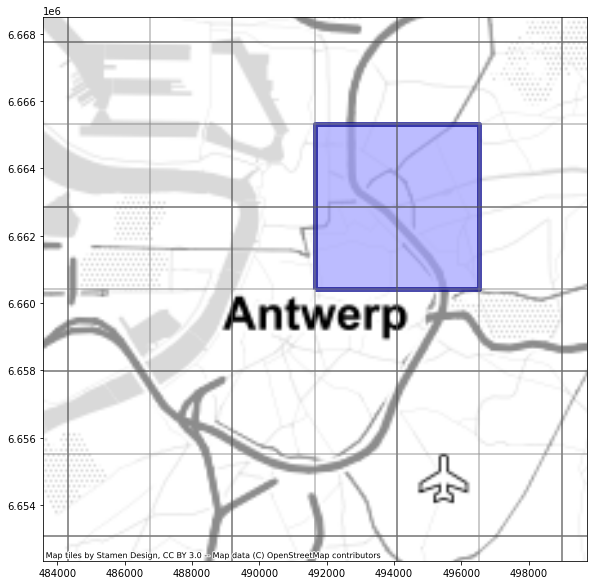

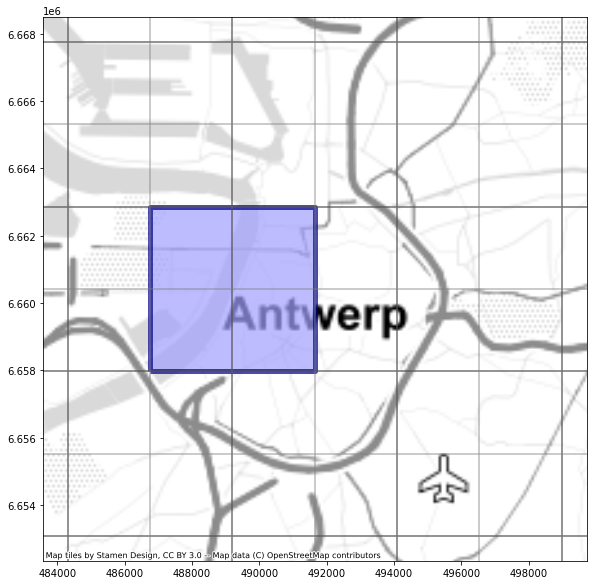

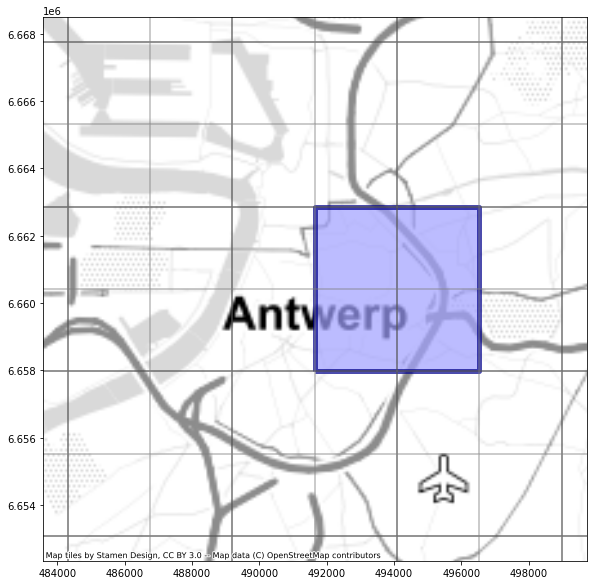

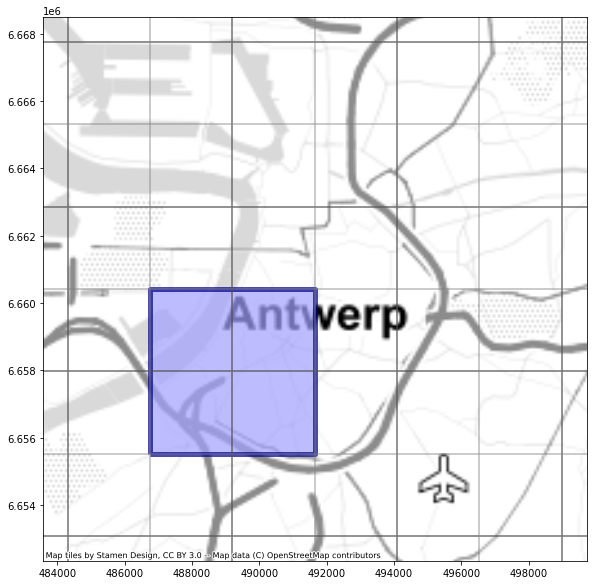

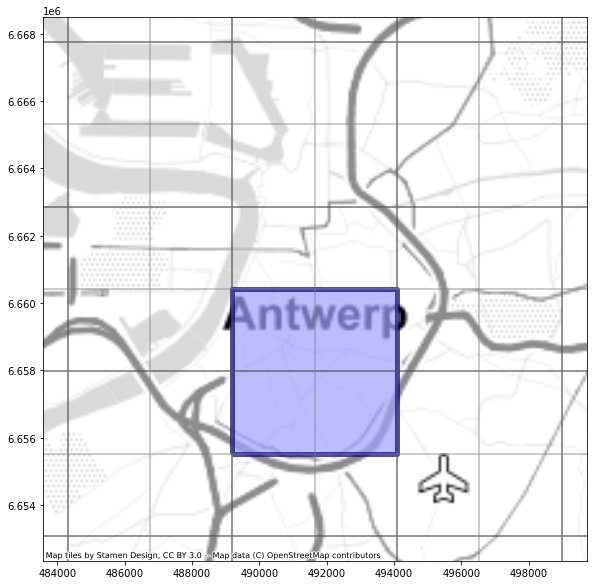

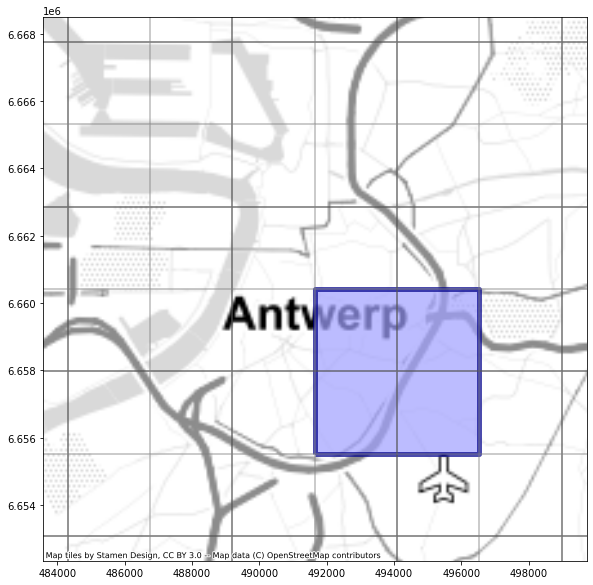

In [13]:
ylim = ax1.get_ylim()
xlim = ax1.get_xlim()

queries_gdf = pd.concat([q13_gdf, q14_gdf], ignore_index=True)

#fig1, ax2 = plt.subplots(figsize=(20,20), nrows=2, ncols=2)
iter_ = 0
for i in range(queries_gdf.shape[0]):
    #x_iter = int(iter_ / 2)
    #y_iter = int(iter_ % 2)
    ax4 = queries_gdf.loc[[i],'geometry'].plot(figsize=(10, 10), edgecolor='darkblue', linewidth=5., alpha=0.7, facecolor="#a0a0ff")
    z13_grid.plot(ax=ax4, alpha=0.2, linewidth=2., facecolor="none", edgecolor="black")
    z14_grid.plot(ax=ax4, alpha=0.3, linewidth=1.5, facecolor="none", edgecolor="grey")
#     ax4.set_title(f'Query {i+1} (Zoom={13 if iter_ < 4 else 14})')
    iter_ = iter_ + 1
    ax4.set_ylim(ylim)
    ax4.set_xlim(xlim)
    ctx.add_basemap(ax4, zoom=11, url=ctx.providers.Stamen.TonerLite)
    ax4.figure.savefig(f'query-{i+1}.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [17]:
for q in tiles_z13.values():
    for t in q:
        print('\item[] \\texttt{%s/%s/%s}' % (t.z, t.x, t.y))
    print()

\item[] \texttt{13/4196/2734}
\item[] \texttt{13/4195/2733}
\item[] \texttt{13/4195/2734}
\item[] \texttt{13/4196/2733}

\item[] \texttt{13/4196/2734}
\item[] \texttt{13/4196/2733}
\item[] \texttt{13/4197/2733}
\item[] \texttt{13/4197/2734}

\item[] \texttt{13/4196/2735}
\item[] \texttt{13/4195/2734}
\item[] \texttt{13/4195/2735}
\item[] \texttt{13/4196/2734}

\item[] \texttt{13/4197/2735}
\item[] \texttt{13/4196/2734}
\item[] \texttt{13/4196/2735}
\item[] \texttt{13/4197/2734}



In [15]:
for p in q14_gdf.to_crs(epsg=4326).geometry.values:
    print(p.bounds)

(4.372558603749999, 51.220647440383296, 4.41650389625, 51.2481631490559)
(4.394531259999999, 51.220647440383296, 4.4384765525, 51.2481631490559)
(4.41650391625, 51.220647440383296, 4.46044920875, 51.2481631490559)
(4.372558603749999, 51.206883404865614, 4.41650389625, 51.23440734163458)
(4.41650391625, 51.206883404865614, 4.46044920875, 51.23440734163458)
(4.372558603749999, 51.19311525464586, 4.41650389625, 51.220647420383294)
(4.394531259999999, 51.19311525464586, 4.4384765525, 51.220647420383294)
(4.41650391625, 51.19311525464586, 4.46044920875, 51.220647420383294)
